In [1]:
import numpy as np

In [19]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def cross_entropy_err(y_hat, y):
    delta = 1e-4
    return -np.sum(y*np.log(y_hat + delta))

## 求梯度所用的偏微分通用公式
def dfunc(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / ( 2*h)
        x[idx] = tmp_val
        it.iternext()
        
    return grad

# 构建两层神经网络所需条件

In [3]:
class ANN:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax_function(a2)
        return y
    
    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)
    
    def numerical_gradient(self, x, y):
        loss_W = lambda W:self.loss(x, y)
        grads = {}
        grads['W1'] = dfunc(loss_W, self.params['W1'])
        grads['b1'] = dfunc(loss_W, self.params['b1'])
        grads['W2'] = dfunc(loss_W, self.params['W2'])
        grads['b2'] = dfunc(loss_W, self.params['b2'])
        return grads

# 建立一个两层神经网络

In [6]:
net = ANN(input_size = 4, hidden_size=5, output_size=3)

In [7]:
net.params['W1'].shape

(4, 5)

In [25]:
net.params['b1'].shape

(5,)

In [9]:
net.params['W2'].shape

(5, 3)

In [10]:
net.params['b2'].shape

(3,)

# 准备好建立网络所需的数据

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data

In [12]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
y = np.zeros((len(iris.target), 3))
for idx, val in enumerate(iris.target):
    y[idx, val] = 1
    
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [15]:
## 计算预测值
y_hat = net.predict(x)

In [16]:
y_hat

array([[0.00220146, 0.00224858, 0.00221626],
       [0.00220159, 0.00224858, 0.00221632],
       [0.00220155, 0.00224863, 0.00221627],
       [0.00220158, 0.00224866, 0.00221626],
       [0.00220144, 0.00224861, 0.00221623],
       [0.00220136, 0.00224861, 0.00221621],
       [0.00220152, 0.00224869, 0.00221621],
       [0.00220149, 0.0022486 , 0.00221626],
       [0.00220164, 0.00224868, 0.00221627],
       [0.00220156, 0.00224859, 0.0022163 ],
       [0.0022014 , 0.00224854, 0.00221626],
       [0.0022015 , 0.00224866, 0.00221623],
       [0.00220159, 0.00224859, 0.00221631],
       [0.00220161, 0.00224866, 0.00221626],
       [0.00220131, 0.00224845, 0.00221628],
       [0.00220123, 0.00224856, 0.00221617],
       [0.00220136, 0.00224856, 0.00221623],
       [0.00220147, 0.00224859, 0.00221626],
       [0.00220137, 0.00224852, 0.00221627],
       [0.0022014 , 0.00224863, 0.0022162 ],
       [0.00220147, 0.00224854, 0.0022163 ],
       [0.00220143, 0.00224863, 0.00221621],
       [0.

# 训练类神经网络

In [20]:
epochs = 3000
lr = 0.01

train_loss = []
for i in range(epochs):
    grad = net.numerical_gradient(x, y)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
        
    loss = net.loss(x, y)
    train_loss.append(loss)

In [21]:
train_loss

[909.7809089056238,
 909.7751811389578,
 909.7659448506006,
 909.7490475860917,
 909.7173464171616,
 909.6578121976008,
 909.5469804290103,
 909.3442898891398,
 908.9844198287487,
 908.373045220332,
 907.3909706631548,
 905.8932461134798,
 903.6623602453855,
 900.338938144291,
 895.4790823988006,
 888.7854041905249,
 880.3809707474143,
 870.9682056129886,
 861.6517299154405,
 853.4104390029019,
 846.7423161018768,
 842.0806547763036,
 846.3094522048345,
 926.9470980520632,
 943.3783954613689,
 960.089303986897,
 878.8947401501366,
 870.7680925556359,
 864.78308799908,
 859.5226039595292,
 855.5181186078689,
 851.7808659206697,
 849.3577113081012,
 846.5436123333473,
 844.9129984538065,
 842.3762885957983,
 840.3423251178684,
 837.7976873503922,
 835.1376682990062,
 833.423912962769,
 831.9518775579963,
 831.7782248759839,
 832.398555427361,
 833.7059885849562,
 836.2983743798236,
 836.6025712108406,
 836.2791069818428,
 834.4350290722396,
 831.3524244313895,
 830.0552270451037,
 828.02

# 训练损失图

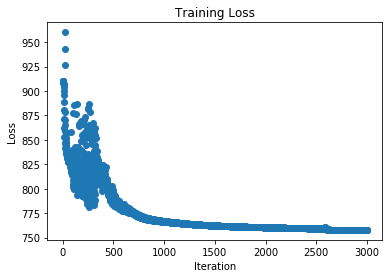

In [32]:
import matplotlib.pyplot as plt
plt.scatter(range(0, 3000), train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# 验证模型准确度

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix
#net.predict(x)
predicted = np.argmax(net.predict(x), axis = 1)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# accuracy

In [36]:
sum(predicted == iris.target) / len(iris.target)

0.98

In [37]:
accuracy_score(iris.target, predicted)

0.98

# confusion matrix

In [38]:
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  0, 50]])

# 调整交叉熵

In [45]:
def cross_entropy_err(y_hat, y):
    y = y.reshape(1, y.size)
    y_hat = y_hat.reshape(1, y_hat.size)
    batch_size = y_hat.shape[0]
    return -np.sum(y * np.log(y_hat)) / batch_size

# 批次学习

In [46]:
net = ANN(input_size=4, hidden_size=5, output_size=3)

epochs = 3000
lr = 0.01
batch_size = 30

train_loss = []

## 随机梯度下降
for i in range(epochs):
    idx = np.random.choice(iris.data.shape[0], batch_size)
    x_batch = iris.data[idx]
    y_batch = y[idx]
    grad = net.numerical_gradient(x_batch, y_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x_batch, y_batch)
    train_loss.append(loss)

Text(0.5, 1.0, 'Training Loss')

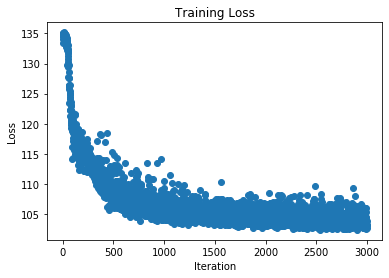

In [47]:
plt.scatter(range(0, 3000), train_loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')

# 验证批次学习模型的准确度

In [48]:
predicted = np.argmax(net.predict(x), axis=1)

sum(predicted == iris.target) / len(iris.target)

0.9733333333333334

In [49]:
accuracy_score(iris.target, predicted)

0.9733333333333334

In [51]:
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 46,  4],
       [ 0,  0, 50]])